In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
#a)Load the "loan_old.csv" dataset
loan_old = pd.read_csv('loan_old.csv')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

There are missing values
Total missing values: 121
Categorical Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Property_Area', 'Loan_Status']
Numerical Columns: ['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History', 'Max_Loan_Amount']
The numerical features do not have the same scale


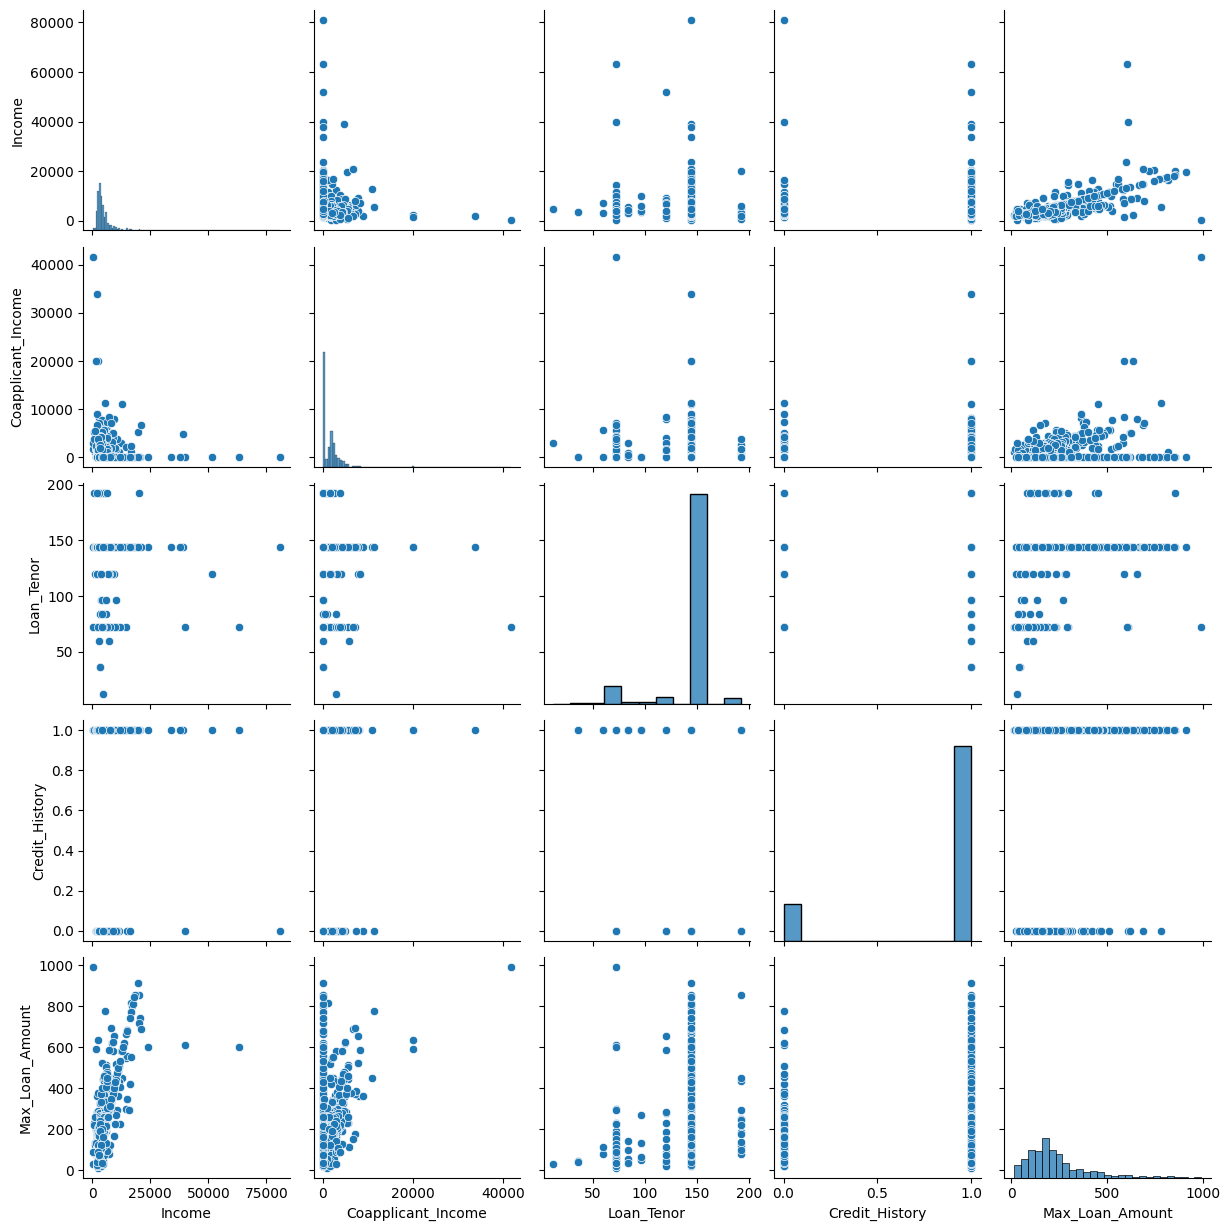

In [ ]:
#b)Perform analysis on the dataset to:
#i) check whether there are missing values

missing_values = loan_old.isnull().sum()
if missing_values.sum() > 0:
    print("There are missing values")
    print("Total missing values:", missing_values.sum())
else:
    print("There are no missing values")

categorical_columns = [column for column in loan_old.columns if loan_old[column].dtype == 'object']
numerical_columns = [column for column in loan_old.columns if loan_old[column].dtype != 'object']
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

# iii) Check whether numerical features have the same scale
numerical_columns_data = loan_old.select_dtypes(include=[int, float])
range_values = numerical_columns_data.max() - numerical_columns_data.min()
if (range_values.iloc[0] == range_values).all():
    print("The numerical features have the same scale")
else:
    print("The numerical features do not have the same scale")

# iv) Visualize a pairplot between numerical columns
sns.pairplot(numerical_columns_data)
plt.show()


In [ ]:
#c)
# i) Remove records containing missing values
loan_old = loan_old.dropna()

# ii) Separate features and targets
X = loan_old.drop(columns=["Max_Loan_Amount", "Loan_Status"])
y_Max_Loan_Amount = loan_old["Max_Loan_Amount"]
y_Loan_Status = loan_old["Loan_Status"]

# iii) Shuffle and split data into training and testing sets
X_train, X_test, y_Max_Loan_Amount_train, y_Max_Loan_Amount_test, y_Loan_Status_train, y_Loan_Status_test = train_test_split(
    X, y_Max_Loan_Amount, y_Loan_Status, test_size=0.3, random_state=42
)

# iv) Categorical features encoding
categorical_features = ["Gender", "Married", "Education", "Property_Area"]
encoder_categorical_features = LabelEncoder()
for feature in categorical_features:
    X_train[feature] = encoder_categorical_features.fit_transform(X_train[feature])
    X_test[feature] = encoder_categorical_features.transform(X_test[feature])

# v) Categorical targets encoding
encoder_categorical_targets = LabelEncoder()
y_status_train = encoder_categorical_targets.fit_transform(y_Loan_Status_train)
y_status_test = encoder_categorical_targets.transform(y_Loan_Status_test)

# vi) Numerical features standardization
numerical_features = ["Income", "Coapplicant_Income", "Loan_Tenor", "Credit_History"]
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features].values)
X_test[numerical_features] = scaler.transform(X_test[numerical_features].values)



In [ ]:
# d) Fit a linear regression model
LR = LinearRegression()
numeric_columns_X_train = X_train.select_dtypes(include=[np.number])
LR.fit(numeric_columns_X_train, y_Max_Loan_Amount_train)
y_Max_Loan_Amount_prediction = LR.predict(X_test[numeric_columns_X_train.columns])


In [ ]:
#e) Evaluate the linear regression model using sklearn's R2 score.
r2 = r2_score(y_Max_Loan_Amount_test, y_Max_Loan_Amount_prediction)
print(f"Linear Regression R2 Score: {r2:.4f}")


Linear Regression R2 Score: 0.2783


In [ ]:
#f) Fit a logistic regression model using gradient descent
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, learning_rate, epochs):
    m, n = X.shape
    X = np.insert(X, 0, 1, axis=1)
    theta = np.zeros(n + 1)

    for epoch in range(epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        error = h - y
        gradient = np.dot(X.T, error) / m
        theta -= learning_rate * gradient

    return theta


In [ ]:
#Write a function to calculate the accuracy of the model
def calc_accuracy(predictions, true_labels):
    accuracy = np.sum(np.equal(predictions, true_labels)) / len(true_labels)
    return accuracy
accuracy = calc_accuracy(y_Max_Loan_Amount_prediction, y_Max_Loan_Amount_test)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [ ]:
#h) Load the "loan_new.csv" dataset.
loan_new = pd.read_csv('loan_new.csv')

In [ ]:
# I)
#i) Records containing missing values are removed
loan_new = loan_new.dropna()

# ii) Separate features and targets
X_new = loan_new.drop(columns=["Loan_ID"])
y_Max_Loan_Amount_new = loan_new["Loan_Tenor"]
y_Loan_Status_new = loan_new["Credit_History"]

# iii) Categorical features encoding
encoder_categorical_features = LabelEncoder()
categorical_columns_new = [column for column in X_new.columns if X_new[column].dtype == 'object']
for feature in categorical_columns_new:
    encoder_categorical_features.fit(X_new[feature])
    X_new[feature] = encoder_categorical_features.fit_transform(X_new[feature])


# iv) Categorical targets encoding
encoder_categorical_targets = LabelEncoder()
y_status_new = encoder_categorical_targets.fit_transform(y_Loan_Status_new)

# v) Numerical features standardization
X_new[numerical_features] = scaler.transform(X_new[numerical_features].values)

# Print first few rows of loan_new for verification
print("First Few Rows of loan_new:")
print(loan_new.head())


First Few Rows of loan_new:
    Loan_ID Gender Married Dependents     Education  Income  \
0  LP001015   Male     Yes          0      Graduate    5720   
1  LP001022   Male     Yes          1      Graduate    3076   
2  LP001031   Male     Yes          2      Graduate    5000   
4  LP001051   Male      No          0  Not Graduate    3276   
5  LP001054   Male     Yes          0  Not Graduate    2165   

   Coapplicant_Income  Loan_Tenor  Credit_History Property_Area  
0                   0       144.0             1.0         Urban  
1                1500       144.0             1.0         Urban  
2                1800       144.0             1.0         Urban  
4                   0       144.0             1.0         Urban  
5                3422       144.0             1.0         Urban  


In [ ]:
# I)
#i) Records containing missing values are removed
loan_new = loan_new.dropna()

# ii) Separate features and targets
X_new = loan_new.drop(columns=["Loan_ID"])
y_Max_Loan_Amount_new = loan_new["Loan_Tenor"]
y_Loan_Status_new = loan_new["Credit_History"]

# iii) Categorical features encoding
encoder_categorical_features = LabelEncoder()
categorical_columns_new = [column for column in X_new.columns if X_new[column].dtype == 'object']
for feature in categorical_columns_new:
    encoder_categorical_features.fit(X_new[feature])
    X_new[feature] = encoder_categorical_features.fit_transform(X_new[feature])


# iv) Categorical targets encoding
encoder_categorical_targets = LabelEncoder()
y_status_new = encoder_categorical_targets.fit_transform(y_Loan_Status_new)

# v) Numerical features standardization
X_new[numerical_features] = scaler.transform(X_new[numerical_features].values)

# Print first few rows of loan_new for verification
print("First Few Rows of loan_new:")
print(loan_new.head())


First Few Rows of loan_new:
    Loan_ID Gender Married Dependents     Education  Income  \
0  LP001015   Male     Yes          0      Graduate    5720   
1  LP001022   Male     Yes          1      Graduate    3076   
2  LP001031   Male     Yes          2      Graduate    5000   
4  LP001051   Male      No          0  Not Graduate    3276   
5  LP001054   Male     Yes          0  Not Graduate    2165   

   Coapplicant_Income  Loan_Tenor  Credit_History Property_Area  
0                   0       144.0             1.0         Urban  
1                1500       144.0             1.0         Urban  
2                1800       144.0             1.0         Urban  
4                   0       144.0             1.0         Urban  
5                3422       144.0             1.0         Urban  


In [ ]:
#J)Use your models on this data to predict the loan amounts and status
#loan prediction
prediction_of_max_loans = model.predict(loan_new)
df_result = pd.DataFrame({'prediction_of_max_loans': prediction_of_max_loans})
#loan status
prediction_of_loan_status = np.where(sigmoid(np.dot(loan_new, theta)) >= 0.5, 1, 0)
df_result['prediction_of_loan_status'] = prediction_of_loan_status

print(df_result)

NameError: ignored